# Justin McClain
## Neural Net (Converted to Convolutional NN)

Load dependencies

In [ ]:
import tensorflow as tf

# Import for plotting
import matplotlib.pyplot as plt

# Import layers to have more selection for building CNN
from tensorflow.keras import layers, models

# Import test split to make our own validation data
from sklearn.model_selection import train_test_split

Load and transform data sets to prepare for CNN

In [ ]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test)  = mnist.load_data()

# Reshaped data to include channel dimension for color, for CNN layers
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# Demonstrating my use of training data split
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Normalize pixel values from 0-255 to 0-1 for better performance
x_train, x_test = x_train / 255.0, x_test / 255.0


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Build the model
model = models.Sequential()

#Base for Convolutional NN
# Conv2D for getting feature from color dimension (the 1 in the input shape)
model.add(layers.Conv2D(32, (3, 3), activation='leaky_relu', input_shape=(28, 28, 1)))

# MaxPooling2D layer to reduce spatial dimensions of the output volume
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Conv2D layer to learn more complex features
model.add(layers.Conv2D(64, (3, 3), activation='leaky_relu'))

# 2nd MaxPooling2D to further reduce size and complexity
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Conv2D layer for deep feature extraction
model.add(layers.Conv2D(64, (3, 3), activation='leaky_relu'))

In [ ]:
# Flatten the output from the convolutional layers to feed into dense layers
model.add(layers.Flatten())

# Dense layer with 64 neurons to learn global patterns in the feature map
model.add(layers.Dense(64, activation='leaky_relu'))

# Increased Dropout to combat overfitting in a deeper network
model.add(layers.Dropout(0.5))

# Output layer remains unchanged, still outputs 10 classes
model.add(layers.Dense(10))

In [ ]:
# Used RMSprop since we have more layers, and left SparseCat crossentropy bc it's
# good for our use case.
model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model, save history for comparison to validation data
history = model.fit(x_train,
                    y_train,
                    epochs=5,
                    validation_data=(x_val, y_val))


Epoch 1/5
1500/1500 [==============================] - 29s 19ms/step - loss: 0.2192 - accuracy: 0.9334 - val_loss: 17.6421 - val_accuracy: 0.9711
Epoch 2/5
1500/1500 [==============================] - 29s 19ms/step - loss: 0.0764 - accuracy: 0.9779 - val_loss: 13.5091 - val_accuracy: 0.9807
Epoch 3/5
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0577 - accuracy: 0.9830 - val_loss: 25.3278 - val_accuracy: 0.9728
Epoch 4/5
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0495 - accuracy: 0.9859 - val_loss: 32.1725 - val_accuracy: 0.9797
Epoch 5/5
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0436 - accuracy: 0.9880 - val_loss: 29.5967 - val_accuracy: 0.9783


In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 2s - loss: 0.0710 - accuracy: 0.9791 - 2s/epoch - 6ms/step


### Compare eval dataset with test set

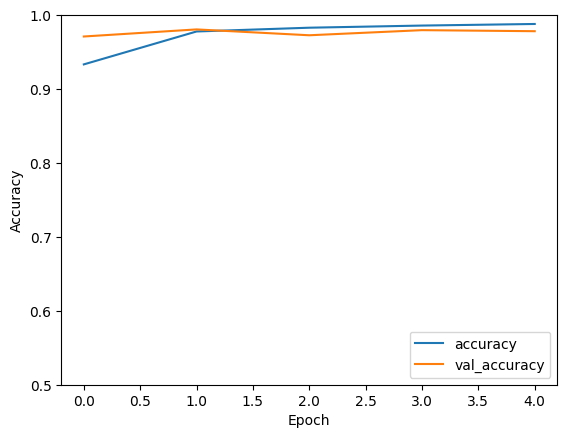

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
for i in range(x_test.size):
  print(x_test)